# 1. Multinomial regression with Python
## 1.1 Load MNIST data

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:


mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

x_train = torch.tensor(mnist.data[:60000], dtype=torch.float) / 255
y_train = torch.tensor([int(x) for x in mnist.target[:60000]])



In [3]:
print(x_train.shape, y_train.shape)

torch.Size([60000, 784]) torch.Size([60000])


label= tensor(5)



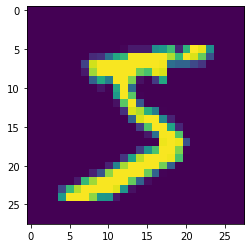

In [4]:
plt.imshow(x_train[0].reshape(28,28))
print("label=", y_train[0])
print()

In [13]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.tensor(x_train, dtype=torch.float32)
    self.y = torch.tensor(y_train, dtype=torch.int64)
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.x.shape[0]

In [14]:
mydata = Data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


## 1.2 Revisiting logistic regression

Assume 

$y =
\begin{cases}
1, \quad \hbox{with probability}\quad  p_1;\\
0, \quad \hbox{with probability}\quad  p_0=1-p;\\
\end{cases}
$

where $p=\sigma(xW+b)$ and $\sigma$ is a sigmoid function defined by

$\sigma(z)=\frac{1}{1+\exp(-z)}$.

Then likelihood function is given by

$L(W, b):=\prod\limits_{y}f_{W, b}(y; x)$

where 

$f_{W, b}(y; x)= I_{[y=0]}p_0+I_{[y=1]}p_1
$

## 1.3 Multinomial regression

Assume 

$y =
\begin{cases}
0, \quad \hbox{with probability}\quad  p_0;\\
1, \quad \hbox{with probability}\quad  p_1;\\
\cdots\\
9, \quad \hbox{with probability}\quad  p_{9};\\
\end{cases}
$

where $p_0+\cdots+p_{9}=1$.

Here, we have the explanatory variable $X=x$, and the question is how do we construct the probabilities $p_0, \cdots, p_9$ from $X=x$. One possible way of construction is 

$p_0 = \frac{\exp(xW_0+b_0)}{\Sigma}, \cdots, p_9 = \frac{\exp(xW_9+b_9)}{\Sigma}$

where $\Sigma = \exp(xW_0+b_0)+\cdots +\exp(xW_9+b_9)$. For simplicity, we also represent 
$p_0 = \frac{\exp(z_0)}{\Sigma}, \cdots, p_9 = \frac{\exp(z_9)}{\Sigma}$ where

$ z_0=xW_0+b_0, \cdots, z_9=xW_9+b_9$.


In such case, we can write 

$P(Y=y)=
\begin{cases}
\frac{\exp(z_0)}{\Sigma}, & y=0;\\
\cdots \\
\frac{\exp(z_9)}{\Sigma}, & y=9;\\
\end{cases}
$

In Pytorch, $P(Y=y)$ can be written as

```
loss_fn = nn.CrpssEntropyLoss()
loss_fn(y, z)
```

Furthermore, we have

$XW_0 +b_0 = Z_0$

$\cdots$

$XW_9 +b_9 = Z_9$

which can be written as 

$X[W_0, \cdots, W_9]+[b_0, \cdots, b_9]=[Z_0, \cdots, Z_9]$.

We rewrite the above

$XW+b = Z$ which can be coded as

```
class my_linear(nn.Module):
  def __init__(self, in_size, out_size):
    super(softmax, self).__init__()
    self.linear = nn.Linear(in_size, out_size)
  def forward(self,x):
    return self.linear(x)

z_model = my_linear(784, 10)
Z=model(X)
```



In [9]:
class my_linear(nn.Module):
  def __init__(self, in_size, out_size):
    super(my_linear, self).__init__()
    self.linear = nn.Linear(in_size, out_size)
  def forward(self,x):
    return self.linear(x)
 


In [15]:
z_model = my_linear(784, 10)


In [17]:
loss_fn = nn.CrossEntropyLoss()
dataloader= DataLoader(dataset = mydata, batch_size=32, shuffle=True)
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)



In [19]:
history=[]
epochs=10
for epoch in range(epochs):
        Phat = z_model(mydata.x)
        LOSS = loss_fn(Phat, mydata.y)
        history.append(LOSS)
        for x,y in dataloader:
          phat = z_model(x)
          loss = loss_fn(phat, y)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()



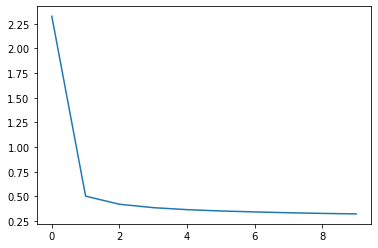

In [20]:
plt.plot(history)

In [24]:
def accuracy(phat, y_true): #phat: [None, 10], y_true: [None]
    y_pred = torch.argmax(phat, dim=1)
    return torch.mean((y_pred == y_true).float())

In [25]:
phat=z_model(mydata.x)
accuracy(phat, mydata.y)

tensor(0.9114)

### Exercise:

Given the same data, you want to use the following ```z_model2``` rather than using ```z_model```. Complete the optimization process.

```
class my_linear2(nn.Module):
  def __init__(self, in_size, out_size):
    super(my_linear, self).__init__()
    self.linear = X@W+b
  def forward(self,x):
    return self.linear(x)

z_model2 = my_linear2(784, 10)
```


## Exercise: Fashion MNIST data


You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the accuracy.

In [35]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [43]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

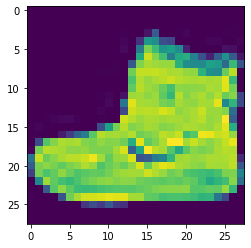

In [42]:
plt.imshow(train_images[0])

In [45]:
labelNames[train_labels[0]]

'ankle boot'